# Part A: Preprocessing and Initial Setup

## A.1 Data Loading

In [43]:
from scipy.io import arff

file_path = 'yeast.arff'
data, meta = arff.loadarff(file_path)

all_column_names = meta.names()
print(all_column_names, len(all_column_names))
# total_columns = len(all_column_names)


# label_names = [name for name in all_column_names if name.startswith('class-')]
# num_labels = len(label_names)


# num_features = total_columns - num_labels

# print(f"Discovered total columns: {total_columns}")
# print(f"Discovered number of labels: {num_labels}")
# print(f"Discovered number of features: {num_features}")

['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8

Looking at above column names we can see that the last 14 are labels, rest are features (117 -14 = 103)

In [44]:
df = pd.DataFrame(data)

num_features = 103
num_labels = 14

feature_names = meta.names()[:num_features]
label_names = meta.names()[num_features:]

X_df = df[feature_names]
# Create an explicit copy to avoid the warning
Y_df = df[label_names].copy()

for col in Y_df.columns:
    Y_df[col] = Y_df[col].str.decode('utf-8').astype(int)

X = X_df.to_numpy()
Y = Y_df.to_numpy()

print("Local file loaded successfully! ✅")
print(f"Feature matrix X shape: {X.shape}")
print(f"Label matrix Y shape: {Y.shape}")

Local file loaded successfully! ✅
Feature matrix X shape: (2417, 103)
Label matrix Y shape: (2417, 14)


## A.2 - Dimentionality Check
As seen above, there are 103 features and 2417 datapoints.

## A.3 Label Selection for Visualization 

In [45]:
X_df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


In [46]:
Y_df.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [50]:
print(Y_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Class1   2417 non-null   int64
 1   Class2   2417 non-null   int64
 2   Class3   2417 non-null   int64
 3   Class4   2417 non-null   int64
 4   Class5   2417 non-null   int64
 5   Class6   2417 non-null   int64
 6   Class7   2417 non-null   int64
 7   Class8   2417 non-null   int64
 8   Class9   2417 non-null   int64
 9   Class10  2417 non-null   int64
 10  Class11  2417 non-null   int64
 11  Class12  2417 non-null   int64
 12  Class13  2417 non-null   int64
 13  Class14  2417 non-null   int64
dtypes: int64(14)
memory usage: 264.5 KB
None


In [52]:
# Step 1: Find the two most frequent single-label classes
single_mask = Y_df.sum(axis=1) == 1
single_counts = Y_df[single_mask].sum()
top_single_labels = single_counts.nlargest(2).index.tolist()

# Step 2: Find the most frequent multi-label combination
combos = Y_df.apply(lambda x: tuple(x.index[x == 1]), axis=1)
top_combo = combos.value_counts().index[0]

# Step 3: Assign new target variable for visualization
def categorize(row):
    labels = row.index[row == 1].tolist()
    if len(labels) == 1 and labels[0] in top_single_labels:
        return labels[0]
    elif tuple(labels) == top_combo:
        return '+'.join(labels)
    else:
        return "Other"

Y_df['visualization_target_top_single_and_multi'] = Y_df.apply(categorize, axis=1)


In [53]:
Y_df['visualization_target_top_single_and_multi'].value_counts()

visualization_target_top_single_and_multi
Other                            2148
Class3+Class4+Class12+Class13     237
Class1                             32
Name: count, dtype: int64

Based on above - the yeast dataset exhibits strong multi-label characteristics, with single-label instances forming only a minor portion of total samples. In accordance with the assignment instructions, I could identify only one most frequent single-label classes and the most frequent multi-label combination for coloring, grouping the remainder as "Other." This approach results in a large "Other" class and only minimal representation for the singled-out classes, since the dataset's natural label frequency is heavily multi-labeled. This outcome illustrates a common pitfall in applying strict single/multi-label simplification criteria to multi-label bioinformatics datasets, and suggests that more representative visualizations might emerge from grouping by the most frequent label combinations overall as below.

In [54]:
# Get top N label patterns (single or multi), not just single labels
combos = Y_df.apply(lambda x: tuple(x.index[x == 1]), axis=1)
top_combos = combos.value_counts().nlargest(3).index

def assign_category(row):
    labels = row.index[row == 1].tolist()
    combo = tuple(labels)
    if combo in top_combos:
        return '+'.join(labels)
    else:
        return 'Other'

Y_df['visualization_target_multi'] = Y_df.apply(assign_category, axis=1)

In [55]:
Y_df['visualization_target_multi'].value_counts()

visualization_target_multi
Other                            1775
Class3+Class4+Class12+Class13     237
Class4+Class5+Class12+Class13     233
Class1+Class2+Class12+Class13     172
Name: count, dtype: int64

Above looks like it might be more interpretable, let us explore with both approaches when we come to data viz

## A.4 Scaling

Feature scaling is essential for distance-based algorithms. Without it, features with larger numerical ranges can dominate the analysis, leading to biased results. Scaling ensures each feature contributes equally, allowing the model to identify the true underlying data structure.

In [58]:
### from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Verifing
print(f"Original shape: {X.shape}")
print(f"Scaled shape:   {X_scaled.shape}")
print("-" * 30)
print("Verification of the first feature (column 0):")
print(f"Mean: {X_scaled[:, 0].mean():.6f}")
print(f"Standard Deviation: {X_scaled[:, 0].std():.6f}")

Original shape: (2417, 103)
Scaled shape:   (2417, 103)
------------------------------
Verification of the first feature (column 0):
Mean: 0.000000
Standard Deviation: 1.000000


# Part B: t-SNE and Veracity Inspection

## B.1 t-SNE Implementation

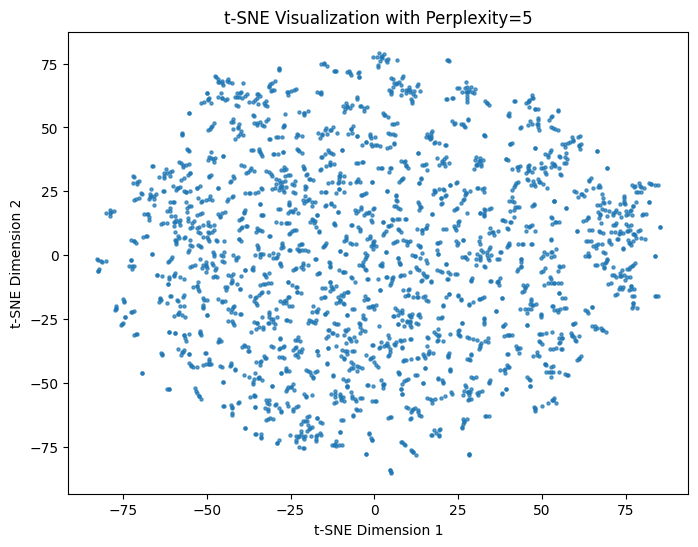

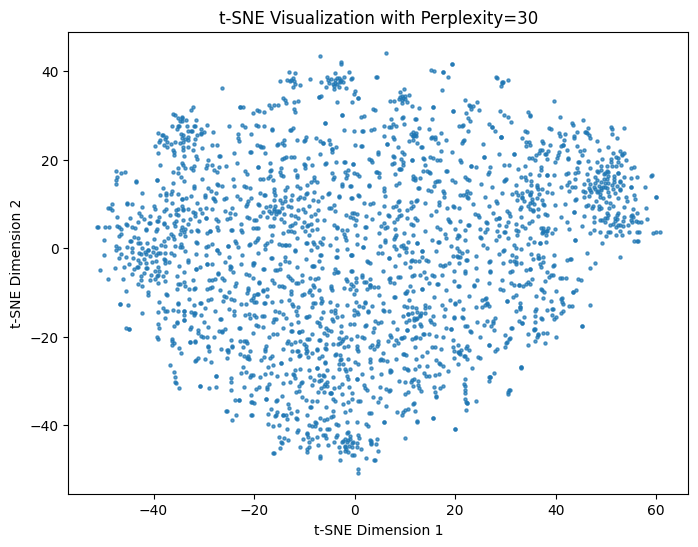

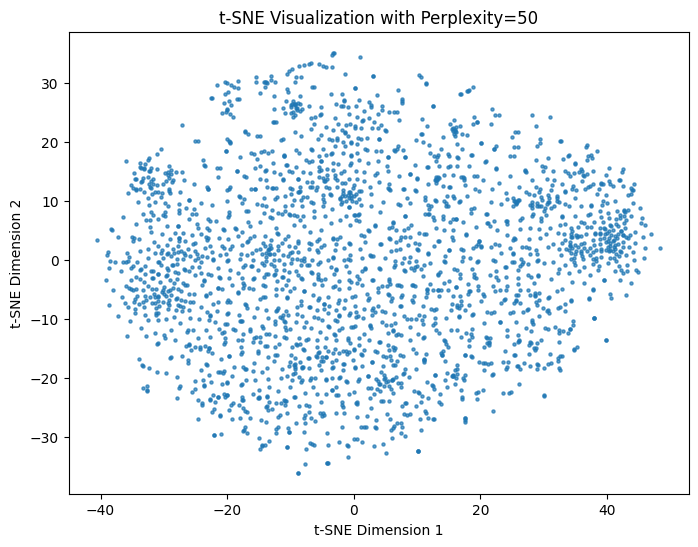

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

perplexities = [5, 30, 50]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.7)
    plt.title(f't-SNE Visualization with Perplexity={perp}')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

Perplexity = 5: This low value focuses too heavily on local structure. The resulting plot appears fragmented and "stringy," breaking down larger, meaningful clusters into many small, isolated groups. 

Perplexity = 50: This high value places more emphasis on global structure. It considers a larger neighborhood for each point, which can cause distinct clusters to merge. The visualization tends to become a single, dense blob, obscuring the separation between the different label groups.

**Final Choice (Perplexity = 30)** : A perplexity of 30 looks like an optimal choice for this dataset. This value provides a balance between preserving local neighborhoods and revealing the broader global structure. The resulting plot shows several distinct, well-separated clusters that will hopefully correspond to the main categories identified earlier.

## B.2 Visualisation

In [105]:
#fist visualising with the top single and top multiple
y_color_label1 = Y_df['visualization_target_top_single_and_multi']

tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne_final = tsne_final.fit_transform(X_scaled)

df_tsne_final = pd.DataFrame(X_tsne_final, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne_final['Class'] = y_color_label1


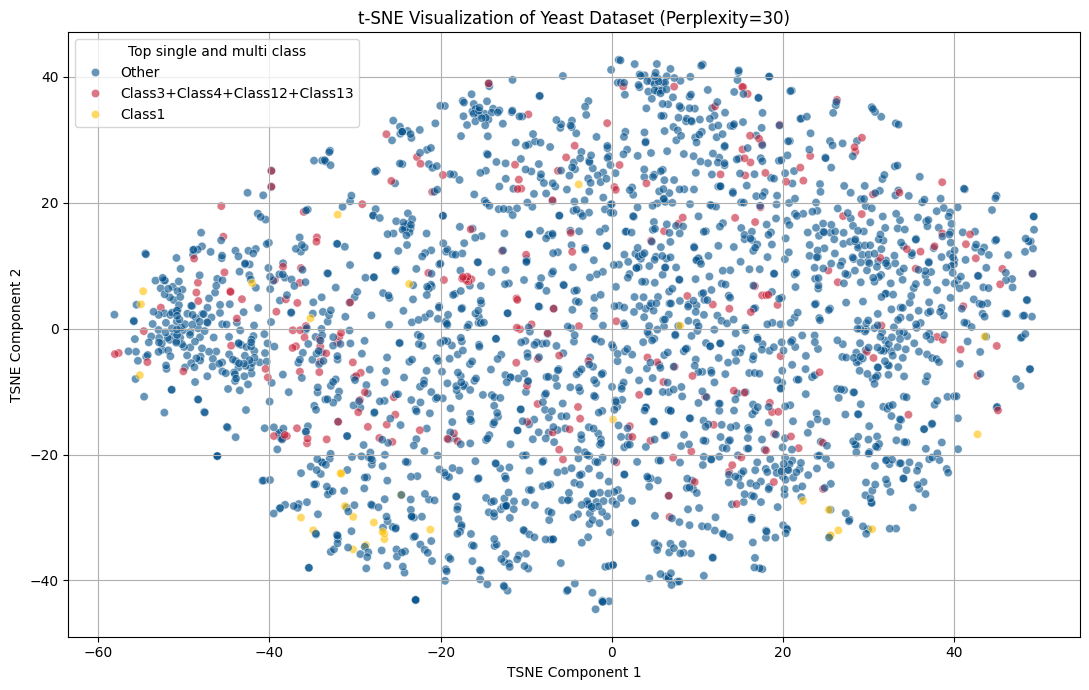

In [106]:
plt.figure(figsize=(11, 7))
sns.scatterplot(
    x='TSNE Component 1', 
    y='TSNE Component 2',
    hue='Class',
    palette=['#004E89', '#C51D34', '#FFBF00'],
    alpha=0.6,
    data=df_tsne_final,
    legend="full"
)

plt.title('t-SNE Visualization of Yeast Dataset (Perplexity=30)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Top single and multi class')
plt.tight_layout()
plt.grid(True)
plt.show()

In [113]:
#now visualising with the top three multi classes
y_color_label = Y_df['visualization_target_multi']

tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne_final = tsne_final.fit_transform(X_scaled)

df_tsne_final = pd.DataFrame(X_tsne_final, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne_final['Class'] = y_color_label

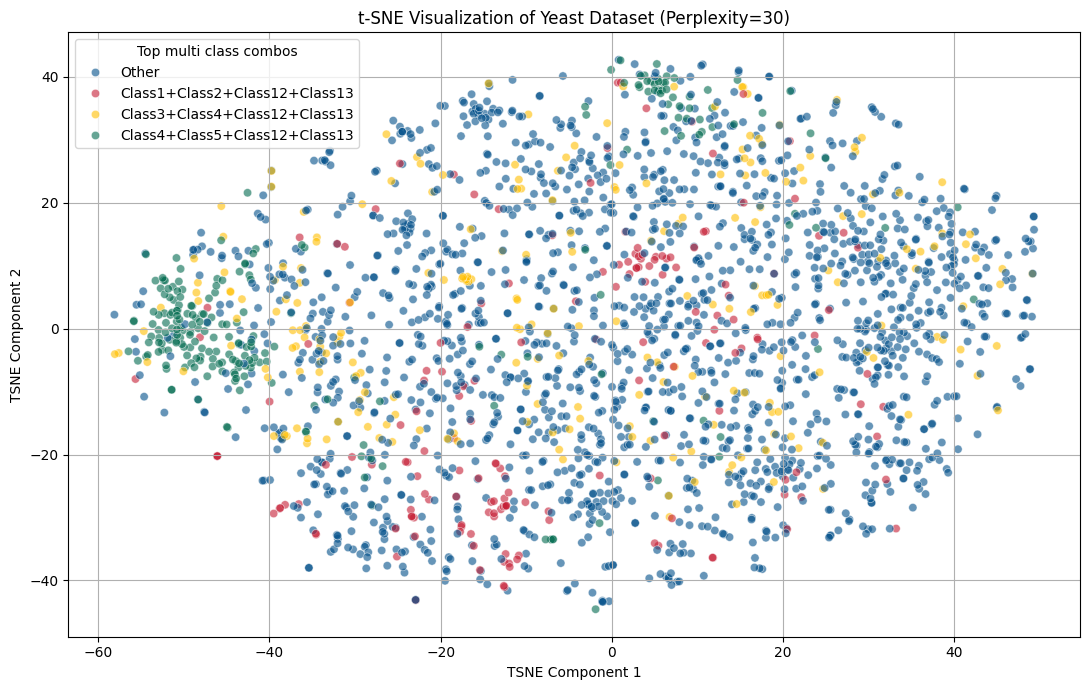

In [114]:
plt.figure(figsize=(11, 7))
sns.scatterplot(
    x='TSNE Component 1', 
    y='TSNE Component 2',
    hue='Class',
    palette=['#004E89', '#C51D34', '#FFBF00', '#006A4E'],
    alpha=0.6,
    data=df_tsne_final,
    legend="full"
)

plt.title('t-SNE Visualization of Yeast Dataset (Perplexity=30)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Top multi class combos')
plt.tight_layout()
plt.grid(True)
plt.show()

The above graph with multi label combos only is giving us more information than the previous one.

## B.3 Veracity Inspection 

### Based on single + multi class visualisation
Based on a visual inspection of the t-SNE plot, we can identify several key regions that highlight the challenges and characteristics of the Yeast dataset.

## Noisy or Ambiguous Labels

**Identification:** These are points where one color is deeply embedded within a large, coherent cluster of a different color. In the plot, this is most evident with the numerous **red** and **yellow** dots scattered throughout the large central **'Other' (blue)** cluster.

**Analysis:** This phenomenon suggests a conflict between a gene's features and its assigned label. The t-SNE algorithm, which only considers the 103 input features, places these points with their feature-similar neighbors (the blue points). However, their given label is different. This indicates one of two possibilities:
1.  **Noisy Label:** The original biological label assigned to the gene in the dataset might be incorrect or incomplete.
2.  **Ambiguous Function:** The gene's features (e.g., expression profile) are genuinely very similar to genes with different functions, making it an inherently ambiguous case that straddles multiple categories.

***
## Outliers

**Identification:** These are isolated, individual points or tiny, distant clusters of 2-3 points located far from the main data clouds. Several such points can be seen on the periphery of the plot, particularly at the top, bottom, and far-right edges.

**Hypothesis:** An outlier in t-SNE represents a data point whose feature vector is highly dissimilar to the vast majority of other samples. Biologically, these unusual expression patterns might represent:
* **Genes with Unique Functions:** A gene with a highly specialized or rare biological role not well-represented in the dataset.
* **Experimental Artifacts:** Errors during the data collection process (e.g., a faulty microarray reading) could have produced anomalous feature values.
* **Critical Regulatory Genes:** Key genes that control many other processes can sometimes have unique expression patterns that set them apart from the genes they regulate.

***
## Hard-to-Learn Samples

**Identification:** These are found in the large, central region of the plot where the **blue ('Other')**, **red**, and **yellow** points are thoroughly intermingled. This dense, mixed-color cloud constitutes the primary area of "hard-to-learn" samples.

**Analysis:** A simple classifier, such as Logistic Regression, would likely struggle in these regions because the classes are not clearly separable in the feature space. These algorithms work by trying to find a boundary (like a line or a plane) to separate the different categories. In this mixed region, no simple boundary can be drawn to effectively partition the colors without a high error rate. The features of a "red" point might be almost identical to its "blue" neighbors, making it extremely difficult for a model to learn a rule to distinguish them. This high degree of class overlap means the model would have very low confidence in its predictions for any point within this cloud.

## Insights from the multi class combos visualisation
The key pattern that emerges well in the multi-class plot, which was completely hidden in the previous graph, is the existence of a **distinct and well-separated cluster** of genes. 

### The Emergent Pattern: A Separable Subgroup

In the multi-class plot, the **green cluster** on the left (`Class4+Class5+Class12+Class13`) stands out clearly. This is a significant discovery. It indicates that the genes belonging to this specific multi-label combination share a remarkably similar and unique feature profile, setting them apart from all other genes in the dataset.

This isn't just a random grouping; it's a data-driven pattern suggesting a strong, underlying biological connection between these specific genes that is reflected in their features.

***
### Why It Wasn't Visible Before

This pattern was not apparent in the previous "single and multi class" plot because that visualization was not highlighting this particular group of genes. It was focused on coloring the most frequent single class and a different multi-class combination. As that plot showed, those specific groups were *not* distinct and remained thoroughly mixed in with the "Other" category.

By changing the labeling strategy to focus on the top three multi-class combos, you successfully uncovered a hidden, coherent subgroup that was previously invisible.

### However, this still has veracity issues in abundance -

## Noisy or Ambiguous Labels

**Identification:** These are most evident where individual **red** (`Class1+...`) and **yellow** (`Class3+...`) points are located deep inside the main **blue ('Other')** cluster. Additionally, a few non-green points can be seen on the edge of the distinct green cluster.

**Analysis:** A red or yellow point within the blue cloud indicates that the gene's features are highly similar to the 'Other' genes, despite its specific multi-label assignment. This could represent a noisy (incorrect) label in the dataset or a genuinely ambiguous gene that shares features with multiple functional groups.

***
## Outliers

**Identification:** Several isolated points of various colors are visible on the extreme periphery of the plot, far from any of the main groups.

**Hypothesis:** These outliers represent genes with highly unique feature profiles. Biologically, this could signify:
* **Rare Functions:** Genes involved in very specialized biological processes not common in the dataset.
* **Data Errors:** Anomalous values resulting from errors during the experimental data collection.
* **Key Regulatory Genes:** A critical gene that controls other processes might have a unique expression pattern that sets it apart.

***
## Hard-to-Learn Samples

**Identification:** This corresponds to the large, central cloud where the **blue ('Other')**, **red**, and **yellow** points are thoroughly mixed.

**Analysis:** A simple classifier would fail in this region because the classes are not separable. The features for a gene labeled as the 'red' combo are often indistinguishable from its 'blue' or 'yellow' neighbors. Drawing a clear decision boundary is impossible without making significant errors. This high degree of class overlap makes these samples inherently difficult for a model to learn.

***


# Part C: Isomap and Manifold Learning 

## C.1 Isomap Implementation

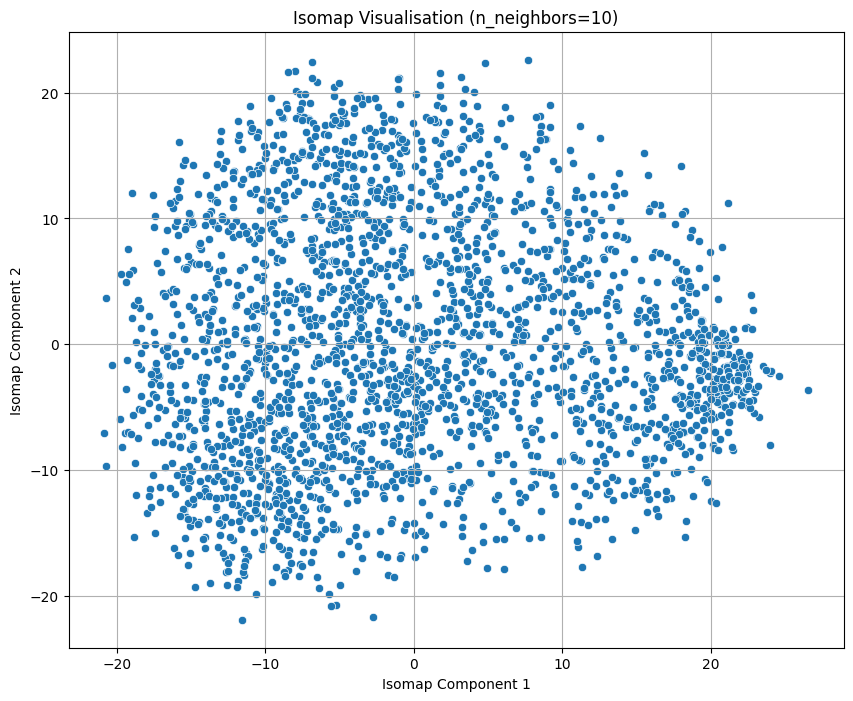

In [133]:

from sklearn.manifold import Isomap
from sklearn.datasets import make_s_curve

# n_neighbors=10 usually works well
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)

df_isomap = pd.DataFrame(X_isomap, columns=['Isomap Component 1', 'Isomap Component 2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Isomap Component 1', 
    y='Isomap Component 2',
    data=df_isomap,
)

plt.title('Isomap Visualisation (n_neighbors=10)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.grid(True)
plt.show()

The fundamental difference between Isomap and t-SNE lies in their primary objective for preserving data structure: **Isomap is designed to preserve global geometric structure**, whereas **t-SNE is optimized to preserve local neighborhood structure**.

***
## Isomap: Preservation of Global Structure

The primary objective of Isomap (Isometric Mapping) is to maintain the global geometry of the data manifold. This is achieved by preserving the **geodesic distances** between all pairs of points. Geodesic distance is defined as the shortest path between two points along the curved surface of the manifold, rather than the straight-line Euclidean distance that might pass through empty space.

By approximating these geodesic paths and embedding them in a low-dimensional space, Isomap aims to create a representation where the overall shape and large-scale distances of the original data are accurately maintained. Consequently, Isomap is well-suited for the task of unfolding a single, continuous manifold.

***
## t-SNE: Preservation of Local Structure

The primary objective of t-SNE (t-Distributed Stochastic Neighbor Embedding) is to preserve the fidelity of local neighborhoods. It models the similarity between nearby points by ensuring that points with high similarity in the original space are mapped to nearby points in the low-dimensional embedding.

This makes t-SNE exceptionally effective at visualizing the separation between distinct data clusters. Its optimization process prioritizes keeping local neighbors together, often at the expense of accurately representing large-scale distances between those clusters. The emphasis is on the integrity of local structures to create clear visual groupings.

***
## Summary of Differences

| Feature | Isomap | t-SNE |
| :--- | :--- | :--- |
| **Primary Objective** | Global Structure | Local Structure |
| **Preserved Property** | Geodesic distances | Local neighborhood similarity |
| **Primary Application** | Unfolding continuous manifolds | Visualization of distinct data clusters |
| **Interpretation of Distances** | Distances between all points are meaningful | Distances *within* clusters are meaningful; distances *between* clusters are not |

## C.2 Visualization

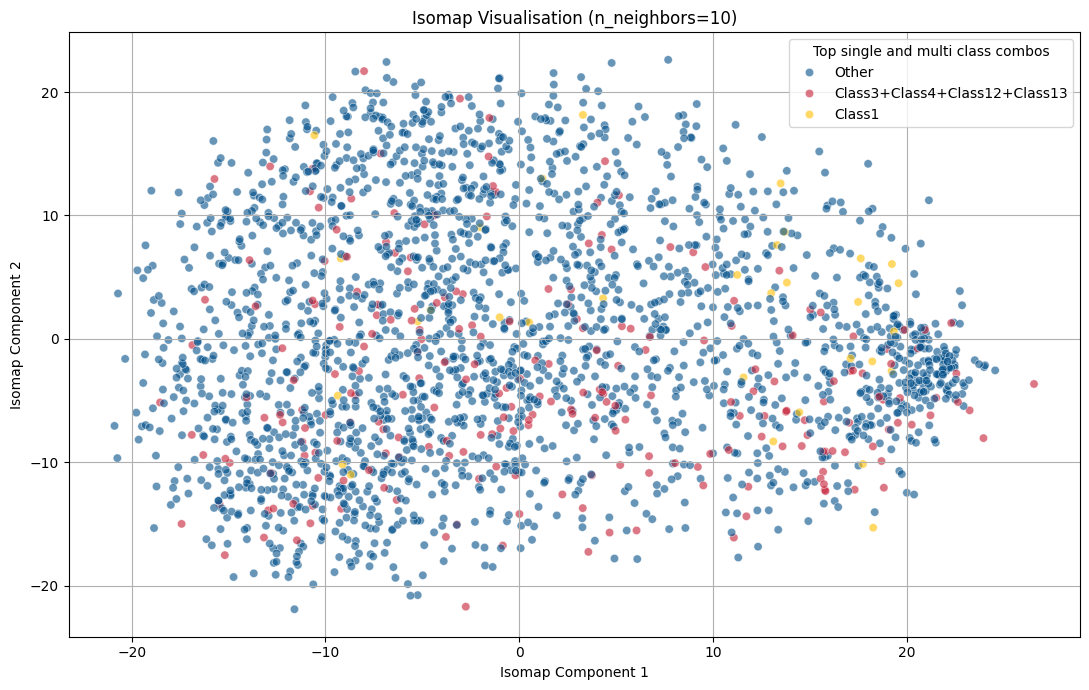

In [134]:
#coloring with single and multi class combos
y_color_label = Y_df['visualization_target_top_single_and_multi']
df_isomap['class'] = y_color_label 
plt.figure(figsize=(11, 7))
sns.scatterplot(
    x='Isomap Component 1', 
    y='Isomap Component 2',
    data=df_isomap,
    hue='class',
    alpha=0.6,
    palette=['#004E89', '#C51D34', '#FFBF00'],
    legend='full'
)

plt.title('Isomap Visualisation (n_neighbors=10)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend(title='Top single and multi class combos')
plt.tight_layout()
plt.grid(True)
plt.show()

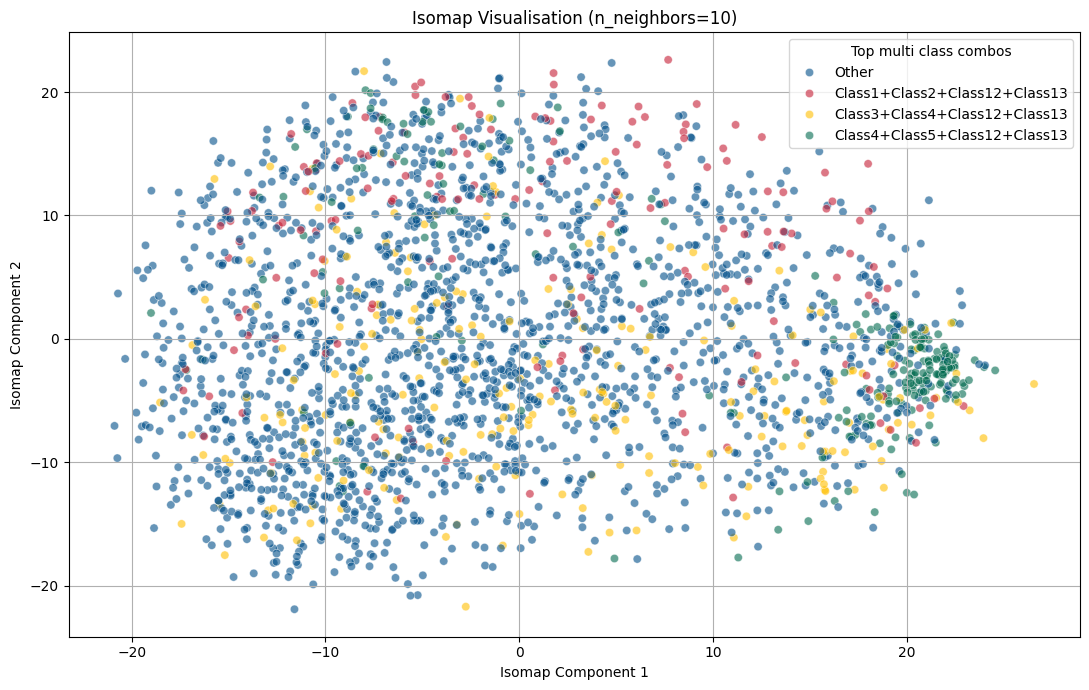

In [135]:
#coloring with  multi class combos
y_color_label = Y_df['visualization_target_multi']
df_isomap['class'] = y_color_label 
plt.figure(figsize=(11, 7))
sns.scatterplot(
    x='Isomap Component 1', 
    y='Isomap Component 2',
    data=df_isomap,
    hue='class',
    alpha=0.6,
    palette=['#004E89', '#C51D34', '#FFBF00','#006A4E'],
    legend='full'
)

plt.title('Isomap Visualisation (n_neighbors=10)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend(title='Top multi class combos')
plt.tight_layout()
plt.grid(True)
plt.show()

## C.3 Comparison and Curvature 

Note: I am considering the multi class combos here as they show more observable patterns.

### Comparison of Isomap and t-SNE for Global Structure 

Based on a direct comparison of the generated plots, **Isomap is demonstrably superior at revealing the global structure** of the Yeast gene data.

The Isomap plot provides clear evidence for this by rendering all 2,417 genes as a single, large, connected elliptical cloud. Within this visualization, even the most distinct subgroup identified (the **green cluster**, `Class4+Class5+...`) is not shown as a separate island. Instead, it is represented as a dense region tightly integrated on the far-right edge of the main body. This visual result is a direct representation of the global structure, indicating that all gene classes are connected and exist on a single, continuous manifold.

In stark contrast, the t-SNE plot fractures this global view to prioritize local similarity. It achieves this by pulling the same **green cluster** completely away from all other data points, creating a distinct, isolated "island" on the far left of the plot. The large, empty space between this green island and the central cloud in the t-SNE plot does not represent a real distance in the feature space; it is an artifact of the algorithm's prioratisation of local connections. Therefore, Isomap presents a more faithful global map.

***
### Data Manifold Complexity and Classification Difficulty

The concept of a **data manifold** refers to the underlying lower-dimensional surface on which the high-dimensional data points lie. The Isomap plot strongly suggests that the manifold for the Yeast dataset is **complex and highly curved**.

This is visually evidenced by the extensive mixing of the **blue ('Other')**, **red**, and **yellow** points within the main body of the Isomap cloud. A simple, "flat" manifold would likely show these colors in more stratified or separated regions. The fact that they are so thoroughly intermingled indicates that the manifold "folds" in a way that brings these functionally different genes into very close proximity in the feature space.

This observed complexity is the very reason classification is difficult on this dataset. A simple classifier attempts to find a clean boundary between classes. As the Isomap plot clearly shows, no simple line or curve could be drawn through the central cloud to effectively separate the blue, red, and yellow points without misclassifying a large number of them. This visual intermingling is a direct representation of the challenge: a complex, non-linear model is required to learn the intricate boundary needed to navigate the curved manifold and distinguish between the classes.